# Pandas

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Create and populate a 5x2 NumPy array.
my_data = np.array([[0, 3], [10, 7], [20, 9], [30, 14], [40, 15]])

# Create a Python list that holds the names of the two columns.
my_column_names = ['temperature', 'activity']

# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)

# Print the entire DataFrame
print(my_dataframe)

   temperature  activity
0            0         3
1           10         7
2           20         9
3           30        14
4           40        15


In [4]:
# Create a new column named adjusted.
my_dataframe["adjusted"] = my_dataframe["activity"] + 2

# Print the entire DataFrame
print(my_dataframe)

   temperature  activity  adjusted
0            0         3         5
1           10         7         9
2           20         9        11
3           30        14        16
4           40        15        17


In [5]:
print("Rows #0, #1, and #2:")
print(my_dataframe.head(3), '\n')

print("Row #2:")
print(my_dataframe.iloc[[2]], '\n')

print("Rows #1, #2, and #3:")
print(my_dataframe[1:4], '\n')

print("Column 'temperature':")
print(my_dataframe['temperature'])

Rows #0, #1, and #2:
   temperature  activity  adjusted
0            0         3         5
1           10         7         9
2           20         9        11 

Row #2:
   temperature  activity  adjusted
2           20         9        11 

Rows #1, #2, and #3:
   temperature  activity  adjusted
1           10         7         9
2           20         9        11
3           30        14        16 

Column 'temperature':
0     0
1    10
2    20
3    30
4    40
Name: temperature, dtype: int32


### 场景：分析电商网站的销售数据
*假设你是一家电商公司的数据分析师，负责分析最近一个月的销售数据，以优化运营策略。*

📌 任务：
读取数据（CSV 文件）。
数据清洗（处理缺失值、数据类型转换）。
数据分析（计算总销售额、最畅销产品、客户购买行为）。
数据可视化（趋势分析、产品销量排名）。
导出清理后的数据（存储为新的 CSV 文件）。


   Order_ID        Date Customer_ID   Product  Quantity   Price
0      1001  2024-01-01        C001    Laptop         1  1200.0
1      1002  2024-01-01        C002     Mouse         2    25.0
2      1003  2024-01-02        C001  Keyboard         1    45.0
3      1004  2024-01-02        C003    Laptop         1  1150.0
4      1005  2024-01-03        C004   Monitor         2   300.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order_ID     15 non-null     int64  
 1   Date         15 non-null     object 
 2   Customer_ID  15 non-null     object 
 3   Product      15 non-null     object 
 4   Quantity     15 non-null     int64  
 5   Price        15 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 848.0+ bytes
None
总销售额：7397.00
最畅销产品：
 Product
Mouse         7
Laptop        5
Keyboard      4
Monitor       4
Headphones   

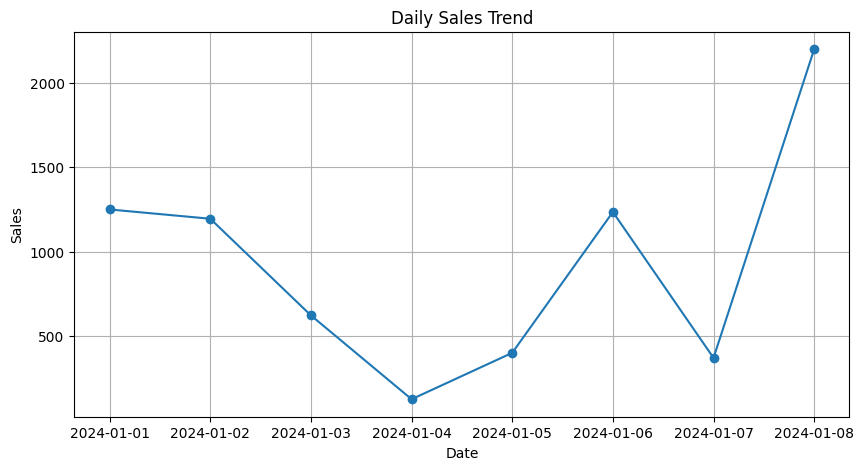

客户平均消费金额：1056.71


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ 读取数据
df = pd.read_csv("sales_data.csv")

# 2️⃣ 查看基本信息
print(df.head())  # 查看前5行
print(df.info())  # 数据类型、缺失值统计

# 3️⃣ 数据清洗
df.dropna(inplace=True)  # 删除缺失值
df['Price'] = df['Price'].astype(float)  # 确保价格是浮点数
df['Date'] = pd.to_datetime(df['Date'])  # 转换日期列

# 4️⃣ 计算总销售额
df['Total_Sales'] = df['Price'] * df['Quantity']
total_sales = df['Total_Sales'].sum()
print(f"总销售额：{total_sales:.2f}")

# 5️⃣ 找到最畅销的产品
best_selling = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print("最畅销产品：\n", best_selling.head())

# 6️⃣ 分析每日销售趋势
daily_sales = df.groupby('Date')['Total_Sales'].sum()
plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Trend')
plt.grid()
plt.show()

# 7️⃣ 计算客户平均消费
customer_avg_spend = df.groupby('Customer_ID')['Total_Sales'].sum().mean()
print(f"客户平均消费金额：{customer_avg_spend:.2f}")

# 8️⃣ 导出清理后的数据
df.to_csv("cleaned_sales_data.csv", index=False)


In [8]:
import pandas as pd
import os
import random

# 模拟生成的图片文件名
image_names = [f"image_{i}.jpg" for i in range(1, 101)]

# 随机为每张图片分配标签（0 = 猫，1 = 狗）
labels = [random.choice([0, 1]) for _ in range(100)]

# 生成一个 DataFrame，模拟图像路径和标签
data = {
    "image_path": [f"images/{name}" for name in image_names],  # 假设图片存放在 'images' 文件夹
    "label": labels
}

df = pd.DataFrame(data)

# 查看数据集的前 5 行
print(df.head())

# 保存为 CSV 文件
df.to_csv("image_data.csv", index=False)


           image_path  label
0  images/image_1.jpg      1
1  images/image_2.jpg      0
2  images/image_3.jpg      0
3  images/image_4.jpg      0
4  images/image_5.jpg      1
